# MINERIA DE DATOS 
### Taller Preprocesamiento 
#### PROFESORA ELIZABETH LEON GUZMAN 

In [81]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas_profiling import ProfileReport
from pyod.models.knn import KNN

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

---------------------------------------

# 1. Dado un conjunto de datos de una dimensión X = {-5.0, 23.0, 17.6, 7.23, 1.11 } normalizar usando: 
* Min_max normalizacion en el Intervalo [0,1] 
* Min_max normalizacion en el Intervalo [-1,1] 
* Desviación estandar 
* Escala decimal en el intervalo [-1,1] 
* Comparar los resultados y discutir ventajas y desventajas. 


In [14]:
# normalización = ( x – min(x) ) / ( max(x) – min(x) )
X1 = [-5.0, 23.0, 17.6, 7.23, 1.11 ]
df_min_max = pd.DataFrame(X1)

In [28]:
df_min_max.mean()

0    8.788
dtype: float64

In [36]:
df_min_max.describe().T

count   mean        std  min   25%   50%   75%   max
0    5.0  8.788  11.523023 -5.0  1.11  7.23  17.6  23.0

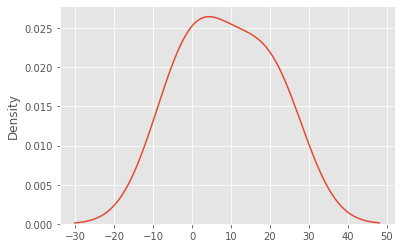

In [37]:
sns.kdeplot(X1)
plt.show()

# 0, 1

In [46]:
# ESCALAMIENTO
# toma calores entre 0, 1: Diferencia entre el valor maxino y el valor minimo
# se calcula como la diferencia entre el maximo y el minimo normalización = ( x – min(x) ) / ( max(x) – min(x) )
# conserva la forma de la distribucion original
# la iportancia de datos atipicos se conserva 
# La media varia


scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_min_max)
scaled_df = pd.DataFrame(scaled_df, columns=['X1'])
print(scaled_df)

         X1
0  0.000000
1  1.000000
2  0.807143
3  0.436786
4  0.218214


In [40]:
scaled_df.describe().T

count      mean       std  min       25%       50%       75%  max
X1    5.0  0.492429  0.411537  0.0  0.218214  0.436786  0.807143  1.0

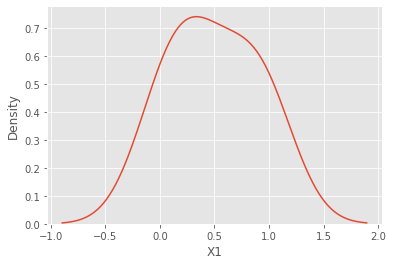

In [21]:
sns.kdeplot(scaled_df["X1"])
plt.show()

# -1, 1

In [45]:
# NORMALIZACION
# toma valores entre -1, 1
# Trabaja sobre las filas no sobre las columnas
# se aplica en normalizacion (por default euclidiana)
# transforma todos los valores entre -1, 1
# raramente se usa

scaler = Normalizer()
scaled_df = scaler.fit_transform(df_min_max)
scaled_df = pd.DataFrame(scaled_df, columns=['X1'])
print(scaled_df)

    X1
0 -1.0
1  1.0
2  1.0
3  1.0
4  1.0


In [23]:
scaled_df.describe().T

count  mean       std  min  25%  50%  75%  max
X1    5.0   0.6  0.894427 -1.0  1.0  1.0  1.0  1.0

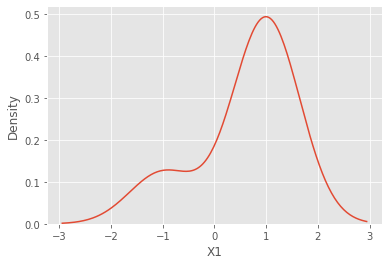

In [24]:
sns.kdeplot(scaled_df["X1"])
plt.show()

# Desviacion estandard

In [41]:
# Estandarizacion
# Sustrae la media de la observacion y luego escala a la unidad de varianza (Desviacion estandard)
# Como resultado entrega una distribucion con una desviaion estandard de 1 y la varianza tambien sera de 1
# El rango varia
# la media es 0
# Se usa cuando necesitamos que una caracteristica sea cercana a una distribucion normal
# los datos atipicos se escalan a un rango mas pequeño

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_min_max)
scaled_df = pd.DataFrame(scaled_df, columns=['X1'])
print(scaled_df)

         X1
0 -1.337796
1  1.378935
2  0.854994
3 -0.151167
4 -0.744966


In [42]:
scaled_df.describe().T

count          mean       std       min       25%       50%       75%  \
X1    5.0  2.220446e-17  1.118034 -1.337796 -0.744966 -0.151167  0.854994   

         max  
X1  1.378935

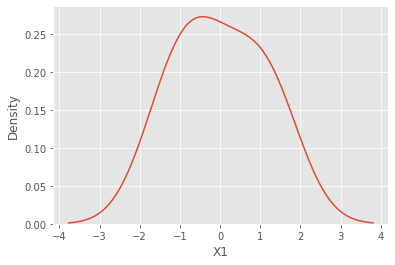

In [43]:
sns.kdeplot(scaled_df["X1"])
plt.show()

# 2. Dado un conjunto de datos de 4 dimensiones con valores perdidos: 
| L1 | L2 | L3 | L4 |
| -- | -- | -- | -- |
| 0  | 1  | 1  | 2  |
| 2  | 1  | ?  | 1  |
| 1  | ?  | ?  | 0  |
|  ? | 2  | 1  | ?  |
| 2  | 2  | 1  | 0  |

* Dado que el dominio para todos los atributos es [0,1,2] ¿Cuál debe ser el número de ejemplos “artificiales” si los valores perdidos son interpretados como “no importa el valor” y ellos son remplazados con todos los posibles valores para su dominio. 
* ¿cuál otro método utilizaría para remplazar los valores pérdidos? 


In [50]:
df_perdidos = pd.DataFrame(
    {
        "L1":[0,2,1, None,2], 
        "L2":[1,1, None ,2,2], 
        "L3":[1, None , None ,1 ,1], 
        "L4":[2,1,0, None ,0]
    }
)

In [52]:
df_perdidos.info

<bound method DataFrame.info of     L1   L2   L3   L4
0  0.0  1.0  1.0  2.0
1  2.0  1.0  NaN  1.0
2  1.0  NaN  NaN  0.0
3  NaN  2.0  1.0  NaN
4  2.0  2.0  1.0  0.0>

In [56]:
df_perdidos.describe().T

count  mean       std  min   25%  50%   75%  max
L1    4.0  1.25  0.957427  0.0  0.75  1.5  2.00  2.0
L2    4.0  1.50  0.577350  1.0  1.00  1.5  2.00  2.0
L3    3.0  1.00  0.000000  1.0  1.00  1.0  1.00  1.0
L4    4.0  0.75  0.957427  0.0  0.00  0.5  1.25  2.0

In [58]:
df_perdidos.median()

L1    1.5
L2    1.5
L3    1.0
L4    0.5
dtype: float64

## Remplazando  con la Media

In [53]:
df_perdidos_replace = df_perdidos.apply(lambda x: x.fillna(x.mean()), axis=0)
df_perdidos_replace

L1   L2   L3    L4
0  0.00  1.0  1.0  2.00
1  2.00  1.0  1.0  1.00
2  1.00  1.5  1.0  0.00
3  1.25  2.0  1.0  0.75
4  2.00  2.0  1.0  0.00

## Remplazandocon la Mediana

In [54]:
df_perdidos_replace = df_perdidos.apply(lambda x: x.fillna(x.median()), axis=0)
df_perdidos_replace

L1   L2   L3   L4
0  0.0  1.0  1.0  2.0
1  2.0  1.0  1.0  1.0
2  1.0  1.5  1.0  0.0
3  1.5  2.0  1.0  0.5
4  2.0  2.0  1.0  0.0

# Remplaza con el anterior

In [59]:
df_perdidos_replace = df_perdidos.fillna(method="ffill")
df_perdidos_replace

L1   L2   L3   L4
0  0.0  1.0  1.0  2.0
1  2.0  1.0  1.0  1.0
2  1.0  1.0  1.0  0.0
3  1.0  2.0  1.0  0.0
4  2.0  2.0  1.0  0.0

# Remplaza con el Siguiente

In [60]:
df_perdidos_replace = df_perdidos.fillna(method="bfill")
df_perdidos_replace

L1   L2   L3   L4
0  0.0  1.0  1.0  2.0
1  2.0  1.0  1.0  1.0
2  1.0  2.0  1.0  0.0
3  2.0  2.0  1.0  0.0
4  2.0  2.0  1.0  0.0

# 3. El número de hijos de diferentes pacientes es dado por el siguiente vector: 
C = {3, 1, 0, 2, 7, 3, 6, 4, −2, 0, 0, 10, 15, 6} 
* Encontrar “outliers” usando parámetros estadisticos estándar: media y varianza
* Si el umbral cambia de ±3 desviaciones estandar a ±2 desviaciones estandar
* ¿Cuál “outlier adicional” se encuentra? 


In [119]:
c = [3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6]
df_outliers_c = pd.DataFrame(c, columns=['C'])
df_outliers_c.T

0   1   2   3   4   5   6   7   8   9   10  11  12  13
C   3   1   0   2   7   3   6   4  -2   0   0  10  15   6

In [128]:
df_outliers_c.describe().T

count      mean       std  min   25%  50%  75%   max
C   14.0  3.928571  4.581976 -2.0  0.25  3.0  6.0  15.0

In [168]:
# RIC =  Q3 - Q1
# Overliers < Q1 - (1.5 x RIC) > Q3 + (1.5 x RIC)

mediana = df_outliers_c['C'].mean()
RIC = df_outliers_c['C'].quantile(0.75) -  df_outliers_c['C'].quantile(0.25) 
VA1 = df_outliers_c['C'].quantile(0.25) - (1.5 * RIC)
VA2 = df_outliers_c['C'].quantile(0.75) + (1.5 * RIC)

print(mediana)
print(RIC)
print("atipico 1: " + str(VA1))
print("atipico 2: " + str(VA2))
print("")
print("===========")
print("ATIPICOS > Q3")
print("===========")
        
df_outliers_c[df_outliers_c.C > VA2]


3.9285714285714284
5.75
atipico 1: -8.375
atipico 2: 14.625

ATIPICOS > Q3


C
12  15

In [160]:
print("")
print("===========")
print("ATIPICOS < Q1")
print("===========")

df_outliers_c[df_outliers_c.C < VA1]


ATIPICOS < Q1


Empty DataFrame
Columns: [C]
Index: []

<AxesSubplot:xlabel='C'>

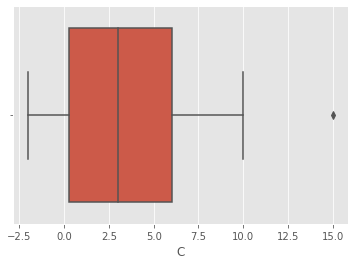

In [162]:
sns.boxplot(x=df_outliers_c['C'])

In [166]:
clf = KNN(contamination=0.18)
clf.fit(df_outliers_c)
y_pred = clf.predict(df_outliers_c)
df_outliers_c[y_pred == 1]

C
11  10
12  15

# 4. Dado un conjuntode tres dimensiones, 
X=[{1,2,0},{3,1,4},{2,1,5},{0,1,6},{2,4,3},{4,4,2},{5,2,1},{7,7,7},{0,0,0},{3,3,3}] 
* Describir el procedimiento e interpretar los resultados de detección de outliers basado en la media y varianza 

In [93]:
list_data = [[1,2,0],[3,1,4],[2,1,5],[0,1,6],[2,4,3],[4,4,2],[5,2,1],[7,7,7],[0,0,0],[3,3,3]]
df_outliers = pd.DataFrame((np.array(list_data)), columns=['a', 'b', 'c'])

In [120]:
df_outliers.T

0  1  2  3  4  5  6  7  8  9
a  1  3  2  0  2  4  5  7  0  3
b  2  1  1  1  4  4  2  7  0  3
c  0  4  5  6  3  2  1  7  0  3

In [91]:
df_outliers.describe().T

count  mean       std  min   25%  50%   75%  max
a   10.0   2.7  2.213594  0.0  1.25  2.5  3.75  7.0
b   10.0   2.5  2.068279  0.0  1.00  2.0  3.75  7.0
c   10.0   3.1  2.424413  0.0  1.25  3.0  4.75  7.0

In [163]:
# RIC =  Q3 - Q1
# Overliers < Q1 - (1.5 x RIC) > Q3 + (1.5 x RIC)

mediana = df_outliers['a'].mean()
RIC = df_outliers['a'].quantile(0.75) -  df_outliers['a'].quantile(0.25) 
VA1 = df_outliers['a'].quantile(0.25) - (1.5 * RIC)
VA2 = df_outliers['a'].quantile(0.75) + (1.5 * RIC)

print(mediana)
print(RIC)
print("atipico 1: " + str(VA1))
print("atipico 2: " + str(VA2))

2.7
2.5
atipico 1: -2.5
atipico 2: 7.5


In [165]:
df_outliers["a"][
    (df_outliers.a <= VA1 - 1.5 * RIC) | (df_outliers.a >= VA2 + 1.5 * RIC) 
]

Series([], Name: a, dtype: int64)

In [172]:
mediana = df_outliers['b'].mean()
RIC = df_outliers['b'].quantile(q=0.75) -  df_outliers['b'].quantile(q=0.25) 
VA1 = df_outliers['b'].quantile(0.25) - 1.5 * RIC
VA2 = df_outliers['b'].quantile(0.75) + 1.5 * RIC
print(mediana)
print(RIC)
print("atipico 1: " + str(VA1))
print("atipico 2: " + str(VA2))

2.5
2.75
atipico 1: -3.125
atipico 2: 7.875


In [169]:
df_outliers["a"][
    (df_outliers.b <= VA1 - 1.5 * RIC) | (df_outliers.b >= VA2 + 1.5 * RIC) 
]

Series([], Name: a, dtype: int64)

In [146]:
mediana = df_outliers['c'].mean()
RIC = df_outliers['c'].quantile(0.75) -  df_outliers['c'].quantile(0.25) 
VA1 = df_outliers['c'].quantile(0.25) - (1.5 * RIC)
VA2 = df_outliers['c'].quantile(0.75) + (1.5 * RIC)
print(mediana)
print(RIC)
print("atipico 1: " + str(VA1))
print("atipico 2: " + str(VA2))

3.1
3.5
atipico 1: -4.0
atipico 2: 10.0


In [83]:
clf = KNN(contamination=0.18)
clf.fit(df_outliers)
y_pred = clf.predict(df_outliers)
df_outliers[y_pred == 1]

a  b  c
7  7  7  7

<AxesSubplot:xlabel='a'>

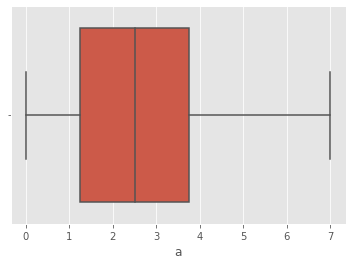

In [87]:
sns.boxplot(x=df_outliers['a'])

<AxesSubplot:xlabel='b'>

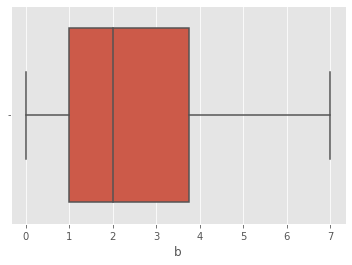

In [88]:
sns.boxplot(x=df_outliers['b'])

<AxesSubplot:xlabel='c'>

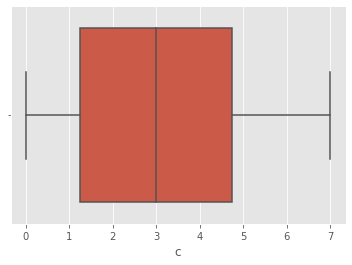

In [89]:
sns.boxplot(x=df_outliers['c'])

# 5. En Weka cargar el conjunto de datos iris. 
* Eliminar manualmente valores (15 %) en sus atributos, para simular valores perdidos. Luego aplicar varios métodos que estan en weka para remplazar esos valores perdidos. Discutir las diferencias entre el valor real y el que valor que lo remplaza, y las diferencias entre los métodos. b) Normalizar usando varios metodos. 
* c) Discretizar usando varios métodos 


# 6. Dado el conjunto de datos: 
Realizar reducción de valores basado en la técnica de BIN con el mejor corte para lo siguiente (mostrar pasos): 

| L1 | L2 | L3 |
| -- | -- | -- |
| 1  | 5.9  | 3.4  |
| 2  | 2.1  | 6.2  |
| 1  | 1.6  | 2.8  |
| 2  | 6.8  | 5.8  |
| 1  | 3.1  | 3.1  |
| 1  | 8.3  | 4.1  |
| 2  | 2.4  | 5.0  |

* Dimensión I2 usando la media como representantes de 2 BINS 
* Dimensión I3 usando el limite más cercano como representante de 2 BINS 7. 

In [207]:
list_data = [[1,5.9,3.4],[2,2.1,6.2],[1,1.6,2.8],[2,6.8,5.8],[1,3.1,3.1],[1,8.3,4.1],[2,2.4,5.0]]
df_bins = pd.DataFrame((np.array(list_data)), columns=['L1', 'L2', 'L3'])

In [208]:
df_bins

L1   L2   L3
0  1.0  5.9  3.4
1  2.0  2.1  6.2
2  1.0  1.6  2.8
3  2.0  6.8  5.8
4  1.0  3.1  3.1
5  1.0  8.3  4.1
6  2.0  2.4  5.0

In [209]:
df_bins.describe().T

count      mean       std  min   25%  50%   75%  max
L1    7.0  1.428571  0.534522  1.0  1.00  1.0  2.00  2.0
L2    7.0  4.314286  2.645391  1.6  2.25  3.1  6.35  8.3
L3    7.0  4.342857  1.346424  2.8  3.25  4.1  5.40  6.2

In [210]:
print("min: ", min(df_bins.L2))
print("max: ", max(df_bins.L2))

min:  1.6
max:  8.3


In [211]:
bins = np.linspace(df_bins.L2.min(), df_bins.L2.max(), 3)
group_names = ["low", "high"]
df_bins["L2-binned"] = pd.cut(df_bins.L2, bins, labels=group_names, include_lowest=True)

In [212]:
bins

array([1.6 , 4.95, 8.3 ])

In [213]:
df_bins

L1   L2   L3 L2-binned
0  1.0  5.9  3.4      high
1  2.0  2.1  6.2       low
2  1.0  1.6  2.8       low
3  2.0  6.8  5.8      high
4  1.0  3.1  3.1       low
5  1.0  8.3  4.1      high
6  2.0  2.4  5.0       low

In [214]:
bins = np.linspace(df_bins.L3.min(), df_bins.L3.max(), 3)
group_names = ["low", "high"]
df_bins["L3-binned"] = pd.cut(df_bins.L3, bins, labels=group_names, include_lowest=True)

In [215]:
df_bins

L1   L2   L3 L2-binned L3-binned
0  1.0  5.9  3.4      high       low
1  2.0  2.1  6.2       low      high
2  1.0  1.6  2.8       low       low
3  2.0  6.8  5.8      high      high
4  1.0  3.1  3.1       low       low
5  1.0  8.3  4.1      high       low
6  2.0  2.4  5.0       low      high

In [233]:
bins = np.linspace(df_bins.L3.min(), df_bins.L3.max(), 3)
df_bins["test_bin"] = pd.cut(df_bins.L3, bins)
df_bins

L1   L2   L3 L2-binned L3-binned    test_bin
0  1.0  5.9  3.4      high       low  (2.8, 4.5]
1  2.0  2.1  6.2       low      high  (4.5, 6.2]
2  1.0  1.6  2.8       low       low         NaN
3  2.0  6.8  5.8      high      high  (4.5, 6.2]
4  1.0  3.1  3.1       low       low  (2.8, 4.5]
5  1.0  8.3  4.1      high       low  (2.8, 4.5]
6  2.0  2.4  5.0       low      high  (4.5, 6.2]

(array([3., 4.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

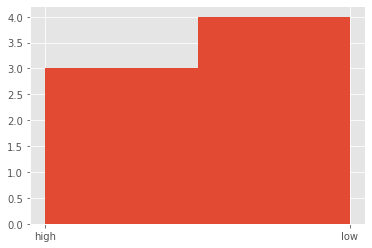

In [236]:
plt.hist(df_bins['L2-binned'], bins=2)

(array([4., 3.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

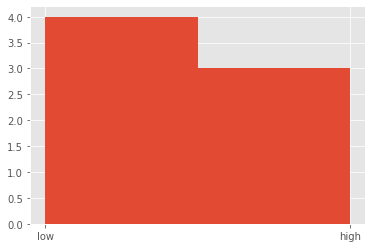

In [237]:
plt.hist(df_bins['L3-binned'], bins=2)

In [239]:
from scipy.stats import binned_statistic
x_data = np.arange(0, len(df_bins))
y_data = df_bins['L3']
y_bins,bin_edges, misc = binned_statistic(x_data,y_data, statistic="median", bins=10)
x_bins = (bin_edges[:-1]+bin_edges[1:])/2
x_bins

array([0.3, 0.9, 1.5, 2.1, 2.7, 3.3, 3.9, 4.5, 5.1, 5.7])

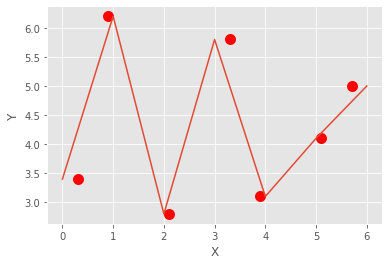

In [242]:
plt.plot(x_data,y_data)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()

# 7. Dado el conjunto de datos con tres dimensiones de entrada y una dimension representando la clase: 

| L1 | L2 | L3 | c |
| -- | -- | -- | -- |
| 2.5  | 1.6  | 5.9  | 0  |
| 7.2  | 4.3  | 2.1  | 1  |
| 3.4  | 5.8  | 1.6  | 1  |
| 5.6 | 3.6  | 6.8  | 0  |
| 4.8  | 7.2  | 3.1  | 1  |
| 8.1  | 4.9  | 8.3  | 0  |
| 6.3  | 4.8  | 2.4  | 1  |

* Hacer el ranking de las dimensiones realizando comparación de medias y varianzas

# 8. Dado el conjunto de datos X, donde X1 y X2 son dimensiones numericas, X3 y X4 son dimensiones con datos categoricos

| X1 | X2 | X3 | X4 |
| -- | -- | -- | -- |
| 2.7  | 3.4  | 1 | A  |
| 3.1  | 6.2  | 2 | A  |
| 4.5  | 2.8  | 1 | B  |
| 5.3  | 5.8  | 2 | B  |
| 6.6  | 3.1  | 1 | A  |
| 5.0  | 4.1  | 2 | B  |

* Aplicar el método se selección de características basado en la entropía para reducir una di mensión (mostrar pasos). 
* Implementar un programa para realizar el “ranking” de dimensiones usando entropía.

# 9. Al conjunto de datos Adult del repositorio de Machine learning: 
* Convertir todos los atributos numéricos a categóricos utilizando dos estrategias diferentes. 
* Transformar el conjunto de datos de manera que todos los atributos sean numéricos. 

# 10. Escoger un conjunto de datos del repositorio de Machine learning, que tenga varias dimensiones y que sean numéricas, y aplicar PCA. Describir el nuevo conjunto de datos. 

In [46]:
df_wine = pd.read_csv('data/winequality-red.csv', delimiter=";")
df_wine.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

In [58]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [59]:
print('-------------------------')
print('Media')
print('-------------------------')
df_wine.mean(axis=0)

-------------------------
Media
-------------------------


fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [60]:
print('-------------------------')
print('Varianza')
print('-------------------------')
df_wine.var(axis=0)

-------------------------
Varianza
-------------------------


fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [71]:
df_wine_y = df_wine['quality']
df_wine_y.head(4)

0    5
1    5
2    5
3    6
Name: quality, dtype: int64

In [74]:
df_wine_x = df_wine.drop(['quality'], axis=1)
df_wine_x.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  
0      9.4  
1      9.8

In [76]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_wine_x)
modelo_pca = pca_pipe.named_steps['pca']

In [77]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_wine_x.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11' ]
)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1        0.489314         -0.238584     0.463632        0.146107   0.212247   
PC2       -0.110503          0.274930    -0.151791        0.272080   0.148052   
PC3       -0.123302         -0.449963     0.238247        0.101283  -0.092614   
PC4       -0.229617          0.078960    -0.079418       -0.372793   0.666195   
PC5       -0.082614          0.218735    -0.058573        0.732144   0.246501   
PC6        0.101479          0.411449     0.069593        0.049156   0.304339   
PC7       -0.350227         -0.533735     0.105497        0.290663   0.370413   
PC8       -0.177595         -0.078775    -0.377516        0.299845  -0.357009   
PC9       -0.194021          0.129110     0.381450       -0.007523  -0.111339   
PC10      -0.249523          0.365925     0.621677        0.092872  -0.217671   
PC11       0.639691          0.002389    -0.070910        0.184030   0.053065   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC1             -0.036158              0.023575  0.395353 -0.438520   
PC2              0.513567              0.569487  0.233575  0.006711   
PC3              0.428793              0.322415 -0.338871  0.057697   
PC4             -0.043538             -0.034577 -0.174500 -0.003788   
PC5             -0.159152             -0.222465  0.157077  0.267530   
PC6             -0.014000              0.136308 -0.391152 -0.522116   
PC7             -0.116596             -0.093662 -0.170481 -0.025138   
PC8             -0.204781              0.019036 -0.239223 -0.561391   
PC9             -0.635405              0.592116 -0.020719  0.167746   
PC10             0.248483             -0.370750 -0.239990 -0.010970   
PC11            -0.051421              0.068702 -0.567332  0.340711   

      sulphates   alcohol  
PC1    0.242921 -0.113232  
PC2   -0.037554 -0.386181  
PC3    0.279786  0.471673  
PC4    0.550872 -0.122181  
PC5    0.225962  0.350681  
PC6   -0.381263  0.361645  
PC7   -0.447469 -0.327651  
PC8    0.374604 -0.217626  
PC9    0.058367 -0.037603  
PC10   0.112320 -0.303015  
PC11   0.069555 -0.314526

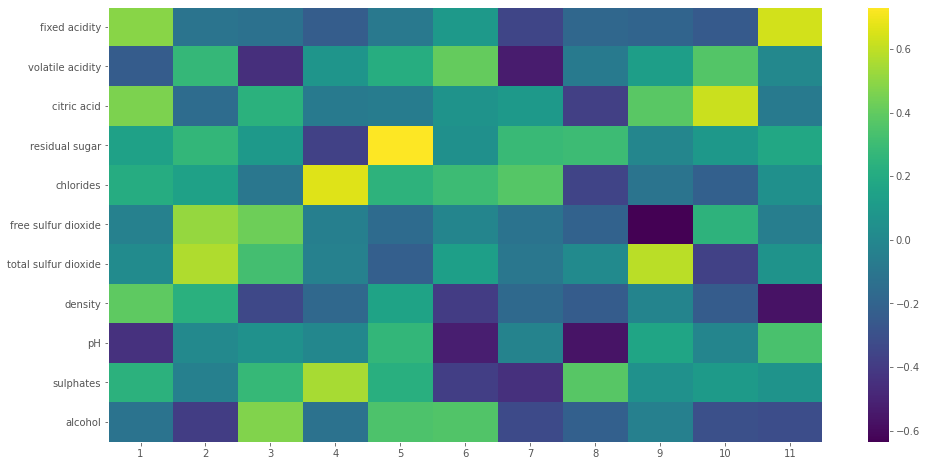

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_wine_x.columns)), df_wine_x.columns)
plt.xticks(range(len(df_wine_x.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


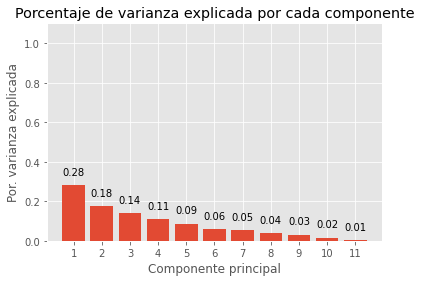

In [82]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_wine_x.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


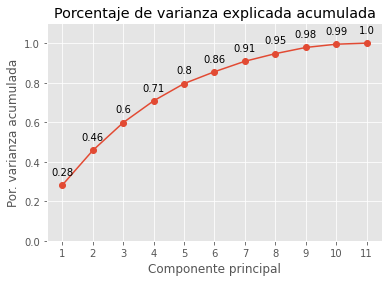

In [83]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_wine_x.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_wine_x.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Proyección de las observaciones de entrenamiento

In [85]:
proyecciones = pca_pipe.transform(X=df_wine_x)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11' ],
    index   = df_wine_x.index
)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   

        PC8       PC9      PC10      PC11  
0 -0.282258  0.005098 -0.267759  0.048630  
1  0.762587 -0.520707  0.062833 -0.138142  
2  0.597946 -0.086857 -0.187442 -0.118229  
3 -0.455375  0.091577 -0.130393  0.316714  
4 -0.282258  0.005098 -0.267759  0.048630

In [87]:
proyecciones = np.dot(modelo_pca.components_, scale(df_wine_x).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11' ])
proyecciones = proyecciones.transpose().set_index(df_wine_x.index)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   

        PC8       PC9      PC10      PC11  
0 -0.282258  0.005098 -0.267759  0.048630  
1  0.762587 -0.520707  0.062833 -0.138142  
2  0.597946 -0.086857 -0.187442 -0.118229  
3 -0.455375  0.091577 -0.130393  0.316714  
4 -0.282258  0.005098 -0.267759  0.048630

In [90]:
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df_wine_x.columns,
                    index   = df_wine_x.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(df_wine_x.head())

------------------
Valores originales
------------------


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

---------------------
Valores reconstruidos
---------------------


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4